In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
df = pd.read_csv('cancer_classification.csv')

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
#30 features and 1 label column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
#stats of the feature data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### EDA

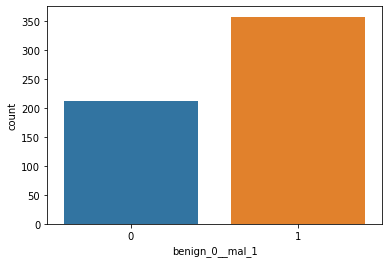

In [12]:
#let us check the number of instances per label using countplot
sns.countplot(x = 'benign_0__mal_1', data = df)

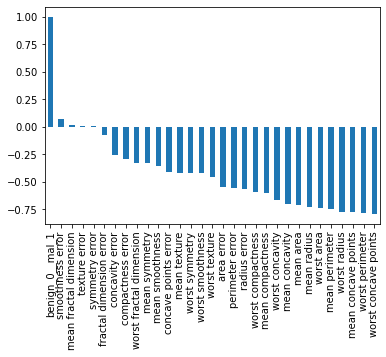

In [16]:
#let us see how correlated our label column is to the features
df.corr()['benign_0__mal_1'].sort_values(ascending= False).plot(kind = 'bar')

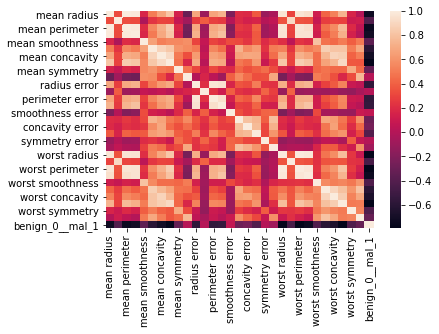

In [17]:
#visualizing correlation using heatmap
sns.heatmap(df.corr())

### Train Test Split

In [20]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
#fitting and transforming our training data to scaler model
X_train = scaler.fit_transform(X_train)

In [26]:
#only transforming the test data to prevent data leakage
X_test = scaler.transform(X_test)

### Creating and training model without callback and dropout layer

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
X_train.shape

(426, 30)

In [30]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))

#Binary classification
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [31]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 27ms/step - loss: 0.7268 - val_loss: 0.6986
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6813 - val_loss: 0.6693
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6438 - val_loss: 0.6360
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6098 - val_loss: 0.5964
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5700 - val_loss: 0.5664
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5253 - val_loss: 0.5146
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4796 - val_loss: 0.4666
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4292 - val_loss: 0.4172
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3805 - val_loss: 0.3751
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3366 - val_loss: 0.3285
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0377 - val_loss: 0.1279
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0360 - val_loss: 0.1264
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0379 - val_loss: 0.1260
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0364 - val_loss: 0.1249
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0357 - val_loss: 0.1273
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0372 - val_loss: 0.1298
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0354 - val_loss: 0.1273
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0341 - val_loss: 0.1298
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0335 - val_loss: 0.1270
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0351 - val_loss: 0.1294


14/14 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.1576
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0208 - val_loss: 0.1591
Epoch 166/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0194 - val_loss: 0.1622
Epoch 167/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0214 - val_loss: 0.1588
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.1616
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.1607
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0202 - val_loss: 0.1611
Epoch 171/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.1611
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0197 - val_loss: 0.1619
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0197 - val_loss: 0.1618
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0193 - val_loss: 0.1896
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.1949
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.1905
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0146 - val_loss: 0.1955
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.1916
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.1964
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.1934
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.1912
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0123 - val_loss: 0.1950
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0124 - val_loss: 0.1932
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.2181
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.2235
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.2257
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.2218
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.2225
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.2305
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.2245
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.2280
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.2219
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.2241
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.2522
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.2508
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.2544
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.2537
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.2619
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.2542
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.2550
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.2565
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.2587
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.2554
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.2884
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.2876
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.2891
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.2895
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.2881
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.2924
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.2895
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.2905
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.2933
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.3053
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.3334
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.3692
Epoch 571/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0031 - val_loss: 0.3199
Epoch 572/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 0.3392
Epoch 573/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.3134
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.3271
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.3234
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.3274
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.3257
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.3301
Epoc

In [32]:
loss = pd.DataFrame(model.history.history)

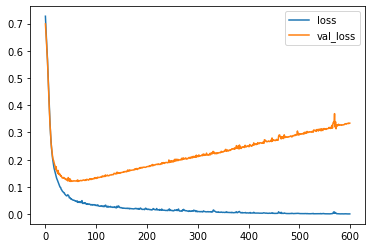

In [33]:
#we can see the model to be overfit as the validation loss is increasing and the model loss is decreasing
loss.plot()

### Adding Earlystop callback to our model

In [34]:
#creating the model again
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))

#Binary classification
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [37]:
#metric to monitor is loss and we want to minimize it, hence mode as min
earlyStop = EarlyStopping(monitor='val_loss', mode= 'min', verbose=1, patience = 25)
#in case we are monitoring accuracy, our mode would be max, as we will want the accuracy to be maximum

In [39]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test), callbacks=[earlyStop])
#we can see the model stops taining at 88th epoch instead of going all the way to 600

Epoch 1/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6592 - val_loss: 0.6500
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6214 - val_loss: 0.6080
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5796 - val_loss: 0.5656
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5352 - val_loss: 0.5144
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4874 - val_loss: 0.4756
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4419 - val_loss: 0.4259
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3982 - val_loss: 0.3832
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3593 - val_loss: 0.3491
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3243 - val_loss: 0.3132
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2952 - val_loss: 0.2889
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0345 - val_loss: 0.1141
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0343 - val_loss: 0.1144
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0342 - val_loss: 0.1140
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0336 - val_loss: 0.1139
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0336 - val_loss: 0.1141
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0329 - val_loss: 0.1158
Epoch 00088: early stopping


In [40]:
updatedLoss = pd.DataFrame(model.history.history)

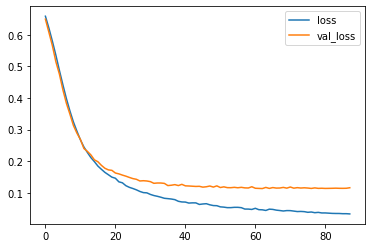

In [41]:
updatedLoss.plot()
#from the new loss plot, it is visible that the validation loss is not increasing now

### Adding dropout to automatically switch off percentage of neurons randomly

In [42]:
from tensorflow.keras.layers import Dropout

In [43]:
#creating the model again
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 15, activation = 'relu'))
model.add(Dropout(0.5))

#Binary classification
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [44]:
earlyStop = EarlyStopping(monitor='val_loss', mode= 'min', verbose=1, patience = 25)

In [45]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test), callbacks=[earlyStop])

Epoch 1/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6989 - val_loss: 0.6674
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6622 - val_loss: 0.6388
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6511 - val_loss: 0.6119
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6344 - val_loss: 0.5867
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6226 - val_loss: 0.5637
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5949 - val_loss: 0.5388
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5633 - val_loss: 0.5067
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5596 - val_loss: 0.5016
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5656 - val_loss: 0.4746
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5449 - val_loss: 0.4485
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1175 - val_loss: 0.1152
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1072 - val_loss: 0.1142
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1074 - val_loss: 0.1135
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1170 - val_loss: 0.1179
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1139 - val_loss: 0.1158
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1084 - val_loss: 0.1140
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1060 - val_loss: 0.1144
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1161 - val_loss: 0.1146
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1060 - val_loss: 0.1165
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0861 - val_loss: 0.1145
Epoch 93/600


In [46]:
Updated2ndLoss = pd.DataFrame(model.history.history)

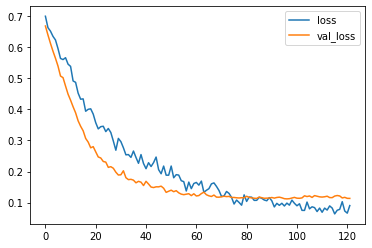

In [47]:
Updated2ndLoss.plot()

### Making predictions

In [49]:
preds = model.predict_classes(X_test)

### Performance Metrics

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.96      0.99      0.98       105

    accuracy                           0.97       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.97      0.97      0.96       143



In [52]:
print(confusion_matrix(y_test, preds))

[[ 34   4]
 [  1 104]]
